* plt.plot 中 color="white" if ~~ else "black"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

parameter = 30

In [5]:
data = pd.DataFrame(index=range(0,parameter),columns=('probability','The true label'))
data['The true label'] = np.random.randint(0,2,size=len(data))
data['probability'] = np.random.choice(np.arange(0.1,1,0.1),len(data['probability']))

In [6]:
data

,probability,The true label
0,0.6,0
1,0.5,1
2,0.9,1
3,0.3,0
4,0.2,1
5,0.2,0
6,0.5,1
7,0.2,1
8,0.4,1
9,0.3,0


In [9]:
cm = np.arange(4).reshape(2,2)
cm[0,0] = len(data[data['The true label']==0][data['probability']<0.5])
cm[0,1] = len(data[data['The true label']==0][data['probability']>=0.5])
cm[1,1] = len(data[data['The true label']==1][data['probability']>=0.5])
cm[1,0] = len(data[data['The true label']==1][data['probability']<0.5])

/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [10]:
cm

array([[ 6, 11],
       [ 3, 10]])

Text(0.5,15,'Predicted label')

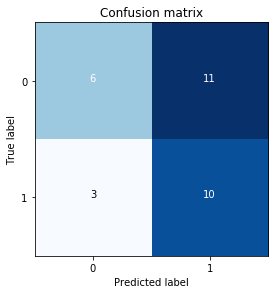

In [11]:
import itertools
classes = [0,1]
plt.figure()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Confusion matrix')
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes,rotation=0)
plt.yticks(tick_marks,classes)
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],
            horizontalalignment="center",
            color="white" if cm[i,j]>thresh else"black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')


In [12]:
data.sort_values('probability',inplace=True,ascending=False)

In [13]:
data

,probability,The true label
2,0.9,1
14,0.9,0
29,0.8,1
13,0.8,1
20,0.8,0
17,0.8,0
28,0.7,0
24,0.7,0
21,0.7,0
18,0.7,0


In [16]:
TPRandFPR = pd.DataFrame(index=range(len(data)),columns=('TP','FP'))

for j in range(len(data)):
    data1 = data.head(n=j+1)
    FP = len(data1[data1['The true label']==0][data1['probability']>=data1.head(len(data1))['probability']])/float(len(data[data['The true label']==0]))
    
    TP=len(data1[data1['The true label']==1][data1['probability']>=data1.head(len(data1))['probability']])/float(len(data[data['The true label']==1]))     
    TPRandFPR.iloc[j]=[TP,FP]



/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


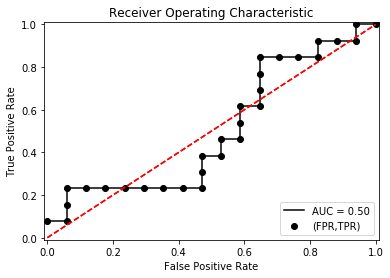

In [17]:
from sklearn.metrics import auc
AUC= auc(TPRandFPR['FP'],TPRandFPR['TP'])
plt.scatter(x=TPRandFPR['FP'],y=TPRandFPR['TP'],label='(FPR,TPR)',color='k')
plt.plot(TPRandFPR['FP'], TPRandFPR['TP'], 'k',label='AUC = %0.2f'% AUC)
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic')
plt.plot([(0,0),(1,1)],'r--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,01.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [19]:
AUC

0.502262443438914